In [65]:
import numpy as np
import pandas as pd
from google.colab import drive
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [66]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
dataset_path = "/content/drive/My Drive/NASA/"

In [68]:
files = os.listdir(dataset_path)
print(files)

['labeled_anomalies.csv', '.DS_Store', 'data']


In [69]:
csv_path = os.path.join(dataset_path, "labeled_anomalies.csv")
anomalies_df = pd.read_csv(csv_path)

print(anomalies_df.head())

  chan_id spacecraft                           anomaly_sequences  \
0     P-1       SMAP  [[2149, 2349], [4536, 4844], [3539, 3779]]   
1     S-1       SMAP                              [[5300, 5747]]   
2     E-1       SMAP                [[5000, 5030], [5610, 6086]]   
3     E-2       SMAP                              [[5598, 6995]]   
4     E-3       SMAP                              [[5094, 8306]]   

                                  class  num_values  
0  [contextual, contextual, contextual]        8505  
1                               [point]        7331  
2              [contextual, contextual]        8516  
3                               [point]        8532  
4                               [point]        8307  


In [70]:
data_path = os.path.join(dataset_path, "data")
data_files = os.listdir(data_path)
print(data_files)

train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")

train_files = os.listdir(train_path)
test_files = os.listdir(test_path)

print("Train files:", train_files)
print("Test files:", test_files)

['.DS_Store', '2018-05-19_15.00.10', 'test', 'train']
Train files: ['D-15.npy', 'T-5.npy', 'E-4.npy', 'C-2.npy', 'P-4.npy', 'A-6.npy', 'F-1.npy', 'E-1.npy', 'T-2.npy', 'B-1.npy', 'A-2.npy', 'E-5.npy', 'A-9.npy', 'P-1.npy', 'E-8.npy', 'M-1.npy', 'G-7.npy', 'T-10.npy', 'A-1.npy', 'G-3.npy', 'E-3.npy', 'D-12.npy', 'P-15.npy', 'M-6.npy', 'T-4.npy', 'G-2.npy', 'F-4.npy', 'A-4.npy', 'T-9.npy', 'D-5.npy', 'S-1.npy', 'E-10.npy', 'E-2.npy', 'M-5.npy', 'M-2.npy', 'D-2.npy', 'D-16.npy', 'E-7.npy', 'D-3.npy', 'D-11.npy', 'P-2.npy', 'T-3.npy', 'G-4.npy', 'E-12.npy', 'D-8.npy', 'D-4.npy', 'S-2.npy', 'F-5.npy', 'D-6.npy', 'P-7.npy', 'P-14.npy', 'D-1.npy', 'D-7.npy', 'F-3.npy', 'E-11.npy', 'D-13.npy', 'F-2.npy', 'D-14.npy', 'G-1.npy', 'P-3.npy', 'P-10.npy', 'P-11.npy', 'D-9.npy', 'C-1.npy', 'T-8.npy', 'M-7.npy', 'A-8.npy', 'T-13.npy', 'E-13.npy', 'M-4.npy', 'A-3.npy', 'G-6.npy', 'A-5.npy', 'T-1.npy', 'E-9.npy', 'R-1.npy', 'F-8.npy', 'F-7.npy', 'E-6.npy', 'T-12.npy', 'A-7.npy', 'M-3.npy']
Test files: [

In [71]:
print(data_path)

/content/drive/My Drive/NASA/data


In [8]:
sample_npy = np.load(os.path.join(train_path, train_files[1]), allow_pickle=True)
print("Data type:", type(sample_npy))
print("Shape:", sample_npy.shape)
print("First few entries:", sample_npy[:5])

Data type: <class 'numpy.ndarray'>
Shape: (2272, 55)
First few entries: [[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [-1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [-1.  0.  0

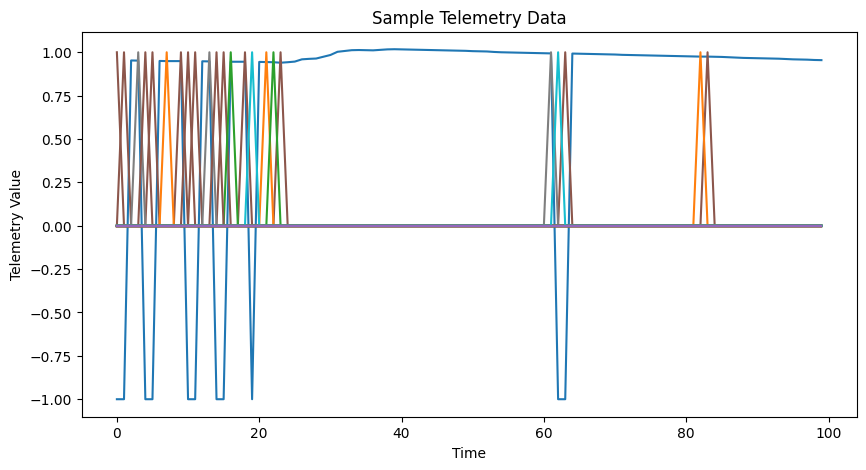

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(sample_npy[:100])
plt.title("Sample Telemetry Data")
plt.xlabel("Time")
plt.ylabel("Telemetry Value")
plt.show()

In [17]:
sample_npy = np.load(os.path.join(train_path, train_files[41]), allow_pickle=True)
print(sample_npy.shape)

(2876, 25)


In [74]:
def load_nasa_data():

    tdata = []
    for file in train_files:
        file_path = os.path.join(data_path, "train", file)
        data = np.load(file_path)
        if data.shape[1] == 25:
            tdata.append(data)
    tdata = np.vstack(tdata)

    testdata = []
    for file in test_files:
        file_path = os.path.join(data_path, "test", file)
        data = np.load(file_path)
        if data.shape[1] == 25:
            testdata.append(data)
    testdata = np.vstack(testdata)

    return tdata, testdata


In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=16):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim * 2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = x.view(x.size(0), -1)
        z_params = self.encoder(x)
        mu, logvar = z_params.chunk(2, dim=1)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

In [75]:
xtrain, xtest = load_nasa_data()

print("Train Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)


def create_sliding_windows(data, window_size=100, step=10):
    windows = [data[i:i+window_size] for i in range(0, data.shape[0] - window_size, step)]
    return np.array(windows)

trainwin = create_sliding_windows(xtrain, window_size=100, step=10)
testwin = create_sliding_windows(xtest, window_size=100, step=10)



def loss_function(recon_x, x, mu, logvar):
    recon_loss = nn.MSELoss()(recon_x, x)
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_divergence



Train Data Shape: (138004, 25)
Test Data Shape: (427186, 25)


In [76]:
print("Train Windows Shape:", trainwin.shape)
print("Test Windows Shape:", testwin.shape)

traintensor = torch.tensor(trainwin, dtype=torch.float32)
testtensor = torch.tensor(testwin, dtype=torch.float32)


input_dim = trainwin.shape[1] * trainwin.shape[2]
vae = VAE(input_dim=input_dim)

Train Windows Shape: (13791, 100, 25)
Test Windows Shape: (42709, 100, 25)


In [77]:
optimizer = optim.Adam(vae.parameters(), lr=0.001)


num_epochs = 20
batch_size = 64

vae.train()
for epoch in range(num_epochs):
    permutation = torch.randperm(traintensor.size(0))

    epoch_loss = 0
    for i in range(0, traintensor.size(0), batch_size):
        batch_indices = permutation[i:i+batch_size]
        batch = traintensor[batch_indices]

        batch = batch.view(batch.size(0), -1)

        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(batch)
        loss = loss_function(recon_batch, batch, mu, logvar)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/20], Loss: 38.0491
Epoch [2/20], Loss: 9.5378
Epoch [3/20], Loss: 8.9227
Epoch [4/20], Loss: 8.7494
Epoch [5/20], Loss: 8.6768
Epoch [6/20], Loss: 8.6297
Epoch [7/20], Loss: 8.6104
Epoch [8/20], Loss: 8.5964
Epoch [9/20], Loss: 8.5850
Epoch [10/20], Loss: 8.5758
Epoch [11/20], Loss: 8.5724
Epoch [12/20], Loss: 8.5642
Epoch [13/20], Loss: 8.5698
Epoch [14/20], Loss: 8.5640
Epoch [15/20], Loss: 8.5585
Epoch [16/20], Loss: 8.5588
Epoch [17/20], Loss: 8.5560
Epoch [18/20], Loss: 8.5538
Epoch [19/20], Loss: 8.5513
Epoch [20/20], Loss: 8.5566


In [ ]:
vae.eval()

def detect_anomalies(test_data, threshold=0.05):
    test_data = test_data.view(test_data.size(0), -1)
    with torch.no_grad():
        recon, _, _ = vae(test_data)
        errors = torch.mean((recon - test_data) ** 2, dim=1)
    return errors > threshold

X_test_flat = testtensor.view(testtensor.size(0), -1)
X_test_reconstructed, _, _ = vae(X_test_flat)
reconstruction_errors = torch.mean((X_test_reconstructed - X_test_flat) ** 2, dim=1)

threshold = torch.mean(reconstruction_errors) + 2 * torch.std(reconstruction_errors)

y_pred = (reconstruction_errors > threshold).int().numpy()
y_test = np.random.randint(0, 2, size=y_pred.shape)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [39]:
torch.save(vae, "NASA_VAE.pth")

In [41]:
torch.save(vae.state_dict(), "NASA_VAE_dict.pth")

In [79]:
import os
import numpy as np
import torch

def detect_anomalies(test_files, dataset_path, vae, window_size=100, step=10, threshold_factor=2.55):

    anomaly_results = {}

    for file in test_files:
        full_test_path = os.path.join(dataset_path, file)

        if not os.path.exists(full_test_path):
            print(f"File not found: {full_test_path}")
            continue

        data = np.load(full_test_path)
        if data.shape[1] != 25:
            print(f"Skipping {file}: Shape {data.shape} does not match expected (timesteps, 25)")
            continue

        windows = create_sliding_windows(data, window_size, step)

        windows_tensor = torch.tensor(windows, dtype=torch.float32).view(windows.shape[0], -1)

        with torch.no_grad():
            reconstructions, _, _ = vae(windows_tensor)
        mse = torch.mean((windows_tensor - reconstructions) ** 2, dim=1).detach().numpy()

        threshold = np.mean(mse) + threshold_factor * np.std(mse)
        anomalies = mse > threshold

        anomaly_results[file] = anomalies.tolist()

        print(f"Processed {file}: {sum(anomalies)} anomalous windows detected.")

    return anomaly_results

dataset_path = "/content/drive/My Drive/NASA/data/test"

test_files = [f for f in os.listdir(dataset_path) if f.endswith(".npy")]
print("Available test files:", test_files)

vae = torch.load("NASA_VAE.pth", map_location=torch.device("cpu"))
vae.eval()

anomaly_results = detect_anomalies(test_files, dataset_path, vae)


Available test files: ['A-6.npy', 'D-8.npy', 'A-9.npy', 'E-12.npy', 'A-5.npy', 'D-16.npy', 'E-3.npy', 'D-5.npy', 'E-11.npy', 'A-3.npy', 'E-10.npy', 'E-7.npy', 'E-1.npy', 'A-7.npy', 'D-9.npy', 'E-5.npy', 'E-6.npy', 'A-8.npy', 'B-1.npy', 'D-4.npy', 'E-13.npy', 'C-1.npy', 'C-2.npy', 'F-1.npy', 'E-8.npy', 'D-3.npy', 'D-15.npy', 'E-2.npy', 'D-7.npy', 'D-11.npy', 'D-2.npy', 'D-1.npy', 'D-6.npy', 'D-12.npy', 'D-13.npy', 'A-4.npy', 'E-9.npy', 'A-2.npy', 'D-14.npy', 'E-4.npy', 'G-3.npy', 'G-1.npy', 'F-7.npy', 'P-15.npy', 'T-10.npy', 'P-10.npy', 'S-2.npy', 'T-13.npy', 'T-1.npy', 'T-8.npy', 'T-9.npy', 'T-4.npy', 'F-3.npy', 'G-2.npy', 'M-3.npy', 'M-6.npy', 'P-2.npy', 'M-2.npy', 'S-1.npy', 'T-5.npy', 'F-4.npy', 'F-8.npy', 'M-5.npy', 'T-12.npy', 'G-6.npy', 'F-2.npy', 'G-7.npy', 'P-7.npy', 'P-11.npy', 'R-1.npy', 'M-1.npy', 'M-7.npy', 'P-14.npy', 'P-1.npy', 'F-5.npy', 'G-4.npy', 'P-3.npy', 'T-3.npy', 'T-2.npy', 'M-4.npy', 'P-4.npy']
Processed A-6.npy: 10 anomalous windows detected.
Processed D-8.npy: 

<ipython-input-79-9a265af92f7c>:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vae = torch.load("NASA_VAE.pth", map_location=torch.device("cpu"))


Processed A-5.npy: 0 anomalous windows detected.
Skipping D-16.npy: Shape (2191, 55) does not match expected (timesteps, 25)
Processed E-3.npy: 0 anomalous windows detected.
Processed D-5.npy: 7 anomalous windows detected.
Processed E-11.npy: 0 anomalous windows detected.
Processed A-3.npy: 1 anomalous windows detected.
Processed E-10.npy: 0 anomalous windows detected.
Processed E-7.npy: 0 anomalous windows detected.
Processed E-1.npy: 0 anomalous windows detected.
Processed A-7.npy: 33 anomalous windows detected.
Processed D-9.npy: 4 anomalous windows detected.
Processed E-5.npy: 3 anomalous windows detected.
Processed E-6.npy: 0 anomalous windows detected.
Processed A-8.npy: 10 anomalous windows detected.
Processed B-1.npy: 0 anomalous windows detected.
Processed D-4.npy: 7 anomalous windows detected.
Processed E-13.npy: 2 anomalous windows detected.
Skipping C-1.npy: Shape (2264, 55) does not match expected (timesteps, 25)
Skipping C-2.npy: Shape (2051, 55) does not match expected (